In [1]:
# Imports and other modules we use
import os # Directory and file reading
import re # Regex
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import Image as IImage
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# We should probably use keras since we want the make an CNN and possibly use our GPU
import keras
from keras import layers

import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
path = "C:/Projects/SWMAL/real_and_fake_face/"

In [2]:
Image_Size= 256
Batch_Size = 32
Channels=3
Epochs=10

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size
)
class_names = dataset.class_names
class_names

Found 2041 files belonging to 2 classes.


['training_fake', 'training_real']

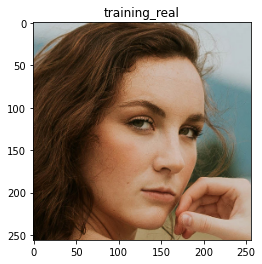

In [4]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [5]:
def splitting_dataset_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split * ds_size)
    val_size= int(val_split * ds_size)
    
    train_ds= ds.take(train_size)
    
    val_ds = ds.skip(train_size)
    
    return train_ds, val_ds

In [6]:
train_ds, val_ds =splitting_dataset_tf(dataset)

In [7]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_Size,Image_Size),
    layers.Rescaling(1.0/255)
])

In [8]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
])

In [9]:
input_shape = (Batch_Size,Image_Size, Image_Size,Channels)
n_classes = 3

model = keras.models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),
    
])

model.build(input_shape=input_shape)

In [10]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
51/51 [==============================] - 84s 2s/step - loss: 0.6843 - accuracy: 0.5538 - val_loss: 0.6873 - val_accuracy: 0.5409
Epoch 2/10
51/51 [==============================] - 85s 2s/step - loss: 0.6811 - accuracy: 0.5618 - val_loss: 0.6699 - val_accuracy: 0.6039
Epoch 3/10
51/51 [==============================] - 109s 2s/step - loss: 0.6798 - accuracy: 0.5692 - val_loss: 0.6806 - val_accuracy: 0.5769
Epoch 4/10
51/51 [==============================] - 113s 2s/step - loss: 0.6786 - accuracy: 0.5692 - val_loss: 0.6877 - val_accuracy: 0.5745
Epoch 5/10
51/51 [==============================] - 87s 2s/step - loss: 0.6806 - accuracy: 0.5742 - val_loss: 0.6465 - val_accuracy: 0.6381
Epoch 6/10
51/51 [==============================] - 100s 2s/step - loss: 0.6781 - accuracy: 0.5711 - val_loss: 0.6855 - val_accuracy: 0.5505
Epoch 7/10
38/51 [=====================>........] - ETA: 20s - loss: 0.6777 - accuracy: 0.5575

In [12]:

scores = model.evaluate(val_ds)


13/13 [==============================] - 13s 472ms/step - loss: 0.6834 - accuracy: 0.5553


In [13]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

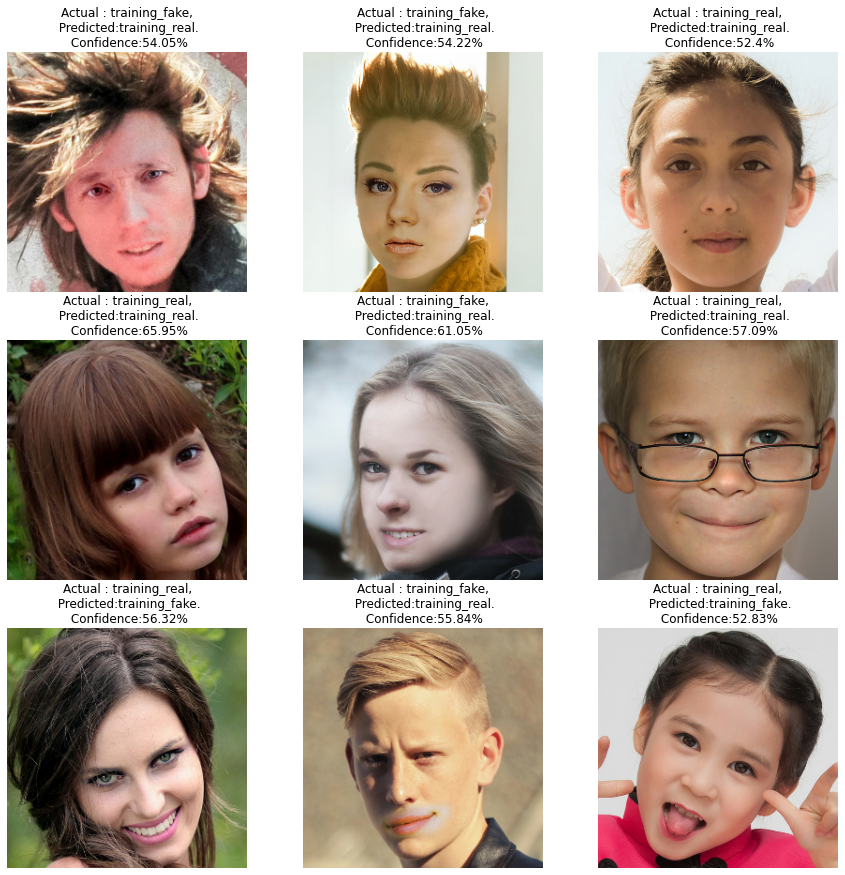

In [14]:
plt.figure(figsize=(15, 15))

for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        
        plt.axis("off")

